In [44]:
from google.colab import drive
drive.mount('/content/drive' ,force_remount=True)

Mounted at /content/drive


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Regression
from sklearn.linear_model import LinearRegression,LogisticRegression

###
from sklearn.model_selection import train_test_split


# Preprocessing :
from sklearn.preprocessing import  StandardScaler, LabelEncoder, Normalizer 

In [46]:
#Applying K-folds validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,StratifiedKFold

In [47]:
# evaluation
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [48]:
# Read datasets
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/Social_Network_Ads.csv")
print(dataset.head())
dataset.shape

   Age  Salary  Status
0   19   19000       0
1   35   20000       0
2   26   43000       0
3   27   57000       0
4   19   76000       0


(400, 3)

In [49]:
X=dataset.iloc[:,:-1].values
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [50]:
Y=dataset.iloc[:,-1].values
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 7)

In [52]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
X_train

array([[ 0.59531408,  1.95866234],
       [-0.71170063, -0.23323283],
       [ 0.22188131, -0.37556368],
       [-0.15155147,  1.36087275],
       [-0.89841702, -0.9448871 ],
       [ 1.15546324, -0.74562391],
       [-1.83199895, -0.0624358 ],
       [-0.80505882,  0.27915825],
       [ 0.3152395 ,  0.05142888],
       [-0.15155147,  2.1009932 ],
       [ 1.90232879, -0.91642093],
       [-1.27184979, -0.43249603],
       [-0.71170063, -0.60329305],
       [-1.0851334 , -0.77409008],
       [-1.36520798, -0.11936814],
       [ 0.96874685,  2.01559468],
       [-0.80505882,  0.1368274 ],
       [ 1.24882144,  1.81633149],
       [-0.33826785, -0.77409008],
       [ 1.90232879,  0.87694784],
       [-0.43162605,  1.2185419 ],
       [ 1.52889602,  0.96234636],
       [-1.73864076, -1.40034584],
       [ 0.3152395 , -0.51789454],
       [ 0.40859769,  0.07989505],
       [ 0.87538866, -1.28648116],
       [ 1.7156124 ,  1.78786532],
       [-0.15155147, -0.4609622 ],
       [-0.24490966,

In [53]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [54]:
pred = model.predict(X_test)

In [55]:
#EVALUATE MODEL

In [56]:
#confusion_matrix
cm=confusion_matrix(Y_test, pred)
print("confusion_matrix")
print(cm)

confusion_matrix
[[60  8]
 [ 6 26]]


In [57]:
#classification_report
cr=classification_report(Y_test, pred)
print("classification_report")
print(cr)

classification_report
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        68
           1       0.76      0.81      0.79        32

    accuracy                           0.86       100
   macro avg       0.84      0.85      0.84       100
weighted avg       0.86      0.86      0.86       100



In [58]:
#accuracy_score
print("Accruacy of the model:{0}%".format(accuracy_score(Y_test,pred)*100))

Accruacy of the model:86.0%


In [59]:
#Receiver operating characteristic (ROC) CURVE

No Skill: ROC AUC=50.000
Logistic Skill: ROC AUC=92.693


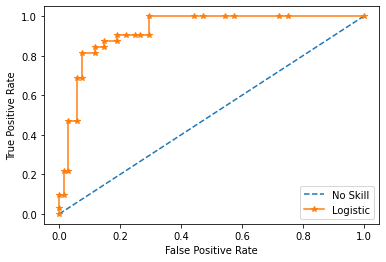

In [60]:
nsProbability = [0 for _ in range(len(Y_test))]
lsProbability = model.predict_proba(X_test)
#keep probability for the positive outcomes only
lsProbability = lsProbability[:, 1]
#calculate score
nsAUC = roc_auc_score(Y_test,nsProbability)
lrAUC = roc_auc_score(Y_test,lsProbability)
#summarise score
print('No Skill: ROC AUC=%0.3f' % (nsAUC*100))
print('Logistic Skill: ROC AUC=%0.3f' % (lrAUC*100))

#calculate roc scores
nsFP, nsTP, _ = roc_curve(Y_test,nsProbability)
lrFP, lrTP, _ = roc_curve(Y_test,lsProbability)
#plot the roc curve for the model
plt.plot(nsFP, nsTP, linestyle='--', label='No Skill')
plt.plot(lrFP, lrTP, marker='*', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#show the legend
plt.legend()
plt.show()


In [61]:
from pandas.core.common import random_state
#cross validation score
kfold = KFold(n_splits=10, shuffle=True, random_state=100)
result = cross_val_score(model,X,Y,cv=kfold)
print("CROSS VALIDATION SCORE: %.2f%%" % (result.mean()*100.0))

CROSS VALIDATION SCORE: 64.25%


In [62]:
#statifield k fold cross validation
skfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=100)
model_skfold = LogisticRegression()
result_skfold = cross_val_score(model_skfold,X,Y,cv=skfold)
print("Statifield K-FOLD SCORE: %.2f%%" % (result_skfold.mean()*100.0))

Statifield K-FOLD SCORE: 64.25%


In [63]:
#Cumulative Accuracy Profile (CAP) curve

32


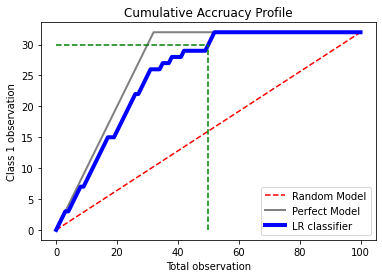

In [64]:
total = len(Y_test)
class_1_count = np.sum(Y_test)
print(class_1_count)
class_0_count = total - class_1_count
 
plt.plot([0, total], [0, class_1_count], c = 'r',
         linestyle = '--', label = 'Random Model')

plt.plot([0,class_1_count, total], [0, class_1_count, class_1_count],
         c = 'gray',linewidth=2, label = 'Perfect Model')

probs = model.predict_proba(X_test)
probs = probs[:,1]

model_y = [y for _, y in sorted(zip(probs, Y_test), reverse = True)]

y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)

plt.plot(x_values, y_values, c = 'b', label = 'LR classifier', linewidth = 4)

index = int((50*total / 100))

#50% verticle line from x-axis
plt.plot([index,index], [0, y_values[index]], c = 'g',
         linestyle = '--')
#horizontal line to y-axis from prediction model
plt.plot([0,index], [y_values[index],y_values[index]], c = 'g',
         linestyle = '--')

class_1_observed = y_values[index]*100 / max(y_values)

plt.xlabel('Total observation')
plt.ylabel('Class 1 observation')
plt.title('Cumulative Accruacy Profile')
plt.legend(loc = 'lower right')